## About slope charts

A __slope chart__, also known as a slope graph or a difference chart, is a graphical representation used to display **changes in values** between two or more **data points or categories**. 

It is particularly useful for comparing the change in values over time, between groups, or across different scenarios. 

The chart consists of a **series of lines connecting data points**, with each line representing the change in value from one point to another.

In this article, we will explain how to create the following slope chart, taken from [machinelearningplus.com](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/).

![Slope chart made with Python](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/graph/web-slope-chart-matplotlib.png?raw=true)

## Libraries

First, you need to install the following librairies:
- [matplotlib](https://python-graph-gallery.com/matplotlib/) is used for creating the slope chart and for customization
- [seaborn](https://python-graph-gallery.com/seaborn/) is used for creating the parallel plot
- `pandas` is used for loading the dataset

In [1]:
# Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Dataset

The data used is a **famous dataset** where each line represents a country, by year, with various measurements, from [Gapminder](https://www.gapminder.org). You can find out more about the dataset on this [Kaggle post](https://www.kaggle.com/datasets/albertovidalrod/gapminder-dataset).

To retrieve the data, we download them directly from this [github repository](https://github.com/jennybc/gapminder/tree/main). 

In [2]:
url = "https://raw.githubusercontent.com/jennybc/gapminder/master/data-raw/08_gap-every-five-years.tsv"
df = pd.read_csv(url, sep='\t')

## Reproducing the slope chart

The very first thing we do is to create a function `add_label()` that will **add the label** of the gdp per capita at a given year, for a given country. In this function, we define the `x_position` according to the year, by **shifting to the left** on 1952 and to the **right otherwise**.

Next, we calculate the **average gdp/capita** of each continent for each date using the pandas `groupby()` method. 

Text and lines are added to the graph using the `text()` and `axvline()` functions.

In [4]:
def add_label(continent_name, year):
    
    # Calculate value (and round it)
    y_position = round(df[year][continent_name])
    
    # Determine x_position depending on the year  
    if year==1952:
        x_position = year - 1.2
    else:
        x_position = year + 0.12
    
    # Adding the text
    plt.text(x_position, # x-axis position
             y_position, #y-axis position
             f'{continent_name}, {y_position}', # Text
             fontsize=8, # Text size
             color='black', # Text color
            ) 

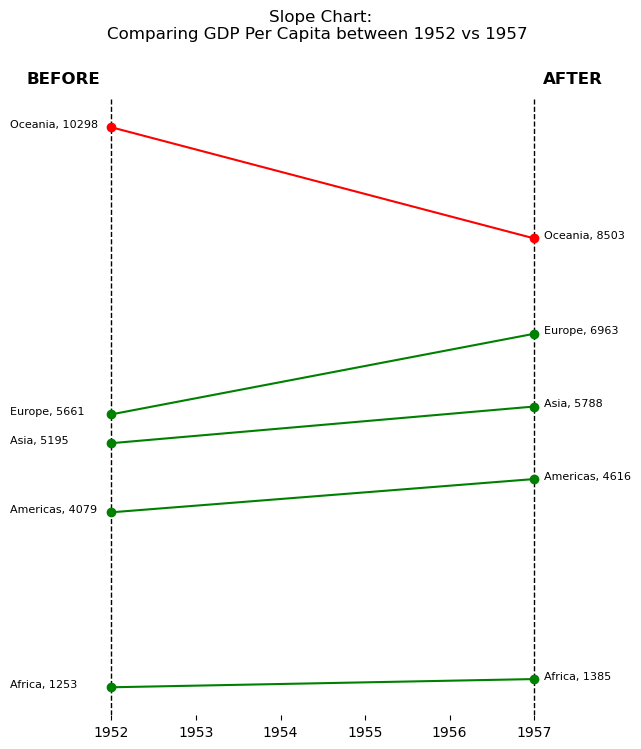

In [5]:
# Filter data for the years 1952 and 1957
years = [1952, 1957]
df = df[df['year'].isin(years)]

# Calculate average gdp, per continent, per year
df = df.groupby(['continent', 'year'])['gdpPercap'].mean().unstack()

# (facultative) We artificially change a value to make at least one continent decreasing between the two dates
df.loc['Oceania',1957] = 8503

# Set figsize
plt.figure(figsize=(6, 8))

# Vertical lines for the years
plt.axvline(x=years[0], color='black', linestyle='--', linewidth=1) # 1952
plt.axvline(x=years[1], color='black', linestyle='--', linewidth=1) # 1957

# Add the BEFORE and AFTER
plt.text(1951, 11000, 'BEFORE', fontsize=12, color='black', fontweight='bold')
plt.text(1957.1, 11000, 'AFTER', fontsize=12, color='black', fontweight='bold')

# Plot the line for each continent
for continent in df.index:
    
    # Color depending on the evolution
    value_before = df[df.index==continent][years[0]][0] #gdp/cap of the continent in 1952
    value_after = df[df.index==continent][years[1]][0] #gdp/cap of the continent in 1957
    
    # Red if the value has decreased, green otherwise
    if value_before > value_after:
        color='red'
    else:
        color='green'
    
    # Add the line to the plot
    plt.plot(years, df.loc[continent], marker='o', label=continent, color=color)

# Add label of each continent at each year
for continent_name in df.index:
    for year in df.columns:
        add_label(continent_name, year)

# Add a title ('\n' allow us to jump lines)
plt.title(f'Slope Chart: \nComparing GDP Per Capita between {years[0]} vs {years[1]}  \n\n\n') 

plt.yticks([]) # Remove y-axis
plt.box(False) # Remove the bounding box around plot
plt.show() # Display the chart

## Going further

This article explains how to reproduce the slope chart from this [article on machinelearningplus.com](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/) (the 18th). 

For more examples of **how to create or customize** your parallel plots with Python, see the [parallel plot section](https://python-graph-gallery.com/parallel-plot/). You may also be interested in creating a [parallel plot with pandas](https://python-graph-gallery.com/150-parallel-plot-with-pandas/).